## Countries of the World - EDA

__Introduction:__

This is an exploratory data analysis (EDA) of the Countries of the World dataset found on Kaggle at: https://www.kaggle.com/fernandol/countries-of-the-world. The goal is to better understand the dataset by exploring key relationships between variables through visualization, focusing specifically on GDP per capita.  It concludes with constructing a linear regression model to predict GDP per capita by region.

__Import libraries and read in data:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%cd "/Users/jonathanlynch/Desktop/DSC_423"

data = pd.read_csv("countries of the world.csv")
data.head(10)

/Users/jonathanlynch/Desktop/DSC_423


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


__Take a look at the data types:__

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

__CLEAN DATA:__

__Rename columns:__

In [3]:
data.columns = (["country","region","population","area","density","coastline","migration","infant mortality","gdp","literacy","phones","arable","crops","other","climate","birth rate","death rate","agriculture","industry","service"])

__Replace commas and change variables to correct types:__

In [4]:
data = data.replace(',', '.', regex = True)

data = data.astype({'country': 'category', 'region': 'category','density': 'float', 'coastline': 'float', 'migration': 'float',
                   'infant mortality': 'float', 'gdp': 'float', 'literacy': 'float', 'phones': 'float',
                   'arable': 'float', 'crops': 'float', 'other': 'float', 'climate': 'float', 'birth rate': 'float',
                   'death rate': 'float', 'agriculture': 'float', 'industry': 'float', 'service': 'float'})    

__Take a look at the missing values:__

In [5]:
print(data.isnull().sum())

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birth rate           3
death rate           4
agriculture         15
industry            16
service             15
dtype: int64


__Replace missing data with the mean value of the region that country belongs to:__

Since the average values of the region that each country belongs to are going to be more representative of the missing attribute values in this dataset than simply taking the averge of the entire dataset for variables with missing data, the below calculations were run in order to replace missing values with the most appropriate estimate/approximation.  The mode was used to estimate missing values for the climate variable, as it is actually categorical. 

In [6]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'climate':
        estimate = data.groupby('region')['climate'].apply(lambda x: x.mode().max())
    else:
        estimate = data.groupby('region')[col].median()
    for region in data['region'].unique():
        data[col].loc[(data[col].isnull())&(data['region']==region)] = estimate[region]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
print(data.isnull().sum())   # verify all missing values were replaced

country             0
region              0
population          0
area                0
density             0
coastline           0
migration           0
infant mortality    0
gdp                 0
literacy            0
phones              0
arable              0
crops               0
other               0
climate             0
birth rate          0
death rate          0
agriculture         0
industry            0
service             0
dtype: int64


__EXPLORE DATA:__

__Show the distribution of categorical region variable:__

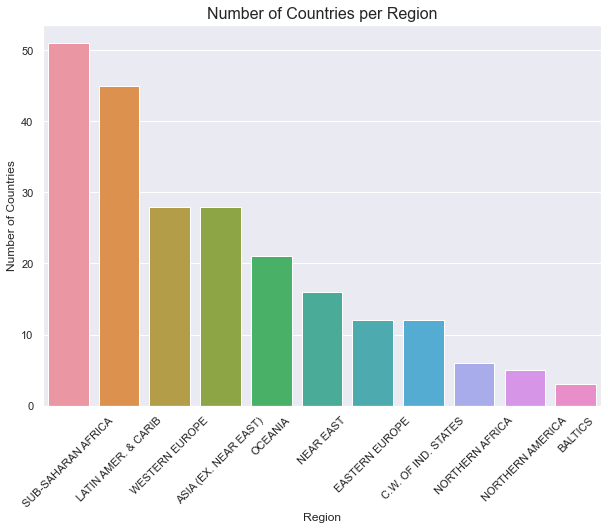

In [16]:
region = data.region.value_counts()
regions = pd.DataFrame({'region':region.index, 'count':region.values})

plt.figure(figsize = (10,7))
sns.set(style = 'darkgrid')
sns.barplot(x = 'region', y = 'count', data = regions, order = regions.groupby('region')['count'].sum().sort_values(ascending = False).index)
plt.xticks(rotation = 45)
plt.ylabel('Number of Countries')
plt.xlabel('Region')
plt.title('Number of Countries per Region', fontsize = 16)
plt.show()

The above bar plot shows the number of countries that belong to each region. Clearly, Sub-Saharan Africa is the region of the world with the greatest number of countries.

__Examine the descriptive statistics of the numerical variables per region:__

In [9]:
data.region = data.region.str.strip()

africa = data[(data.region == 'SUB-SAHARAN AFRICA')]
print("Sub-Saharan African Nations Statistics:\n")
print(africa.describe())
print()

latin_amer = data[(data.region == 'LATIN AMER. & CARIB')]
print("Latin American Nations Statistics:\n")
print(latin_amer.describe())
print()

western_eur = data[(data.region == 'WESTERN EUROPE')]
print("Western European Nations Statistics:\n")
print(western_eur.describe())
print()

asia = data[(data.region == 'ASIA (EX. NEAR EAST)')]
print("Asian Nations Statistics:\n")
print(asia.describe())
print()

oceania = data[(data.region == 'OCEANIA')]
print("Oceanian Nations Statistics:\n")
print(oceania.describe())
print()

near_east = data[(data.region == 'NEAR EAST')]
print("Near Eastern Nations Statistics:\n")
print(near_east.describe())
print()

eastern_eur = data[(data.region == 'EASTERN EUROPE')]
print("Eastern European Nations Statistics:\n")
print(eastern_eur.describe())
print()

cw_ind_states = data[(data.region == 'C.W. OF IND. STATES')]
print("Common Wealth of Independent Nations Statistics:\n")
print(cw_ind_states.describe())
print()

north_africa = data[(data.region == 'NORTHERN AFRICA')]
print("Northern African Nations Statistics:\n")
print(north_africa.describe())
print()

north_amer = data[(data.region == 'NORTHERN AMERICA')]
print("North American Nations Statistics:\n")
print(north_amer.describe())
print()

baltics = data[(data.region == 'BALTICS')]
print("Baltic Nations Statistics:\n")
print(baltics.describe())

Sub-Saharan African Nations Statistics:

         population          area     density   coastline  migration  \
count  5.100000e+01  5.100000e+01   51.000000   51.000000  51.000000   
mean   1.469484e+07  4.772825e+05   92.264706    5.106078  -0.335098   
std    2.309189e+07  5.801928e+05  129.364174   16.961832   2.347984   
min    7.502000e+03  3.740000e+02    2.500000    0.000000 -12.070000   
25%    1.540931e+06  2.794050e+04   17.350000    0.000000  -0.140000   
50%    8.090068e+06  2.458570e+05   39.600000    0.130000   0.000000   
75%    1.562184e+07  7.771020e+05  101.050000    0.765000   0.000000   
max    1.318597e+08  2.505810e+06  608.300000  107.910000   6.780000   

       infant mortality           gdp   literacy      phones     arable  \
count         51.000000     51.000000  51.000000   51.000000  51.000000   
mean          80.039216   2323.529412  62.518627   42.507843  11.703333   
std           33.440061   2614.084026  19.240933   84.084812  12.174566   
min       

         population           area     density  coastline  migration  \
count  1.200000e+01      12.000000   12.000000  12.000000  12.000000   
mean   9.992893e+06   96018.500000  100.900000   1.035000  -0.647500   
std    1.054246e+07   89748.568865   19.844349   2.945349   2.131922   
min    2.010347e+06   20273.000000   66.600000   0.000000  -4.930000   
25%    4.266476e+06   43820.750000   86.225000   0.000000  -1.360000   
50%    6.412408e+06   67704.000000  102.750000   0.065000   0.085000   
75%    1.004486e+07   97500.000000  114.375000   0.252500   0.887500   
max    3.853687e+07  312685.000000  129.800000  10.320000   1.580000   

       infant mortality           gdp   literacy      phones    arable  \
count         12.000000     12.000000  12.000000   12.000000  12.00000   
mean          12.686667   9808.333333  97.466667  280.750000  30.98250   
std            7.665795   4978.765516   3.900893   96.531102  12.97346   
min            3.930000   2200.000000  86.500000   71.2

The above descriptive statistics of the numerical variables of countries subset by the region of the world they belong to shows the mean, median, and standard deviations for each attribute, as well as the minimum, maximum, and first quartile (Q1/25th percentile) and third quartile (Q3/75th percentile).  Some of the more interesting statistics to compare by region are GDP (per capita), literacy rates, infant mortality, and the extent to which each region's economy is based on agriculture versus service.  Wealthier regions tend to have higher literacy rates, more citizens with phones, lower infant mortality, and a larger percentage of their economy based on services as opposed to agriculture.

__Box plot of GDP per capita by region:__

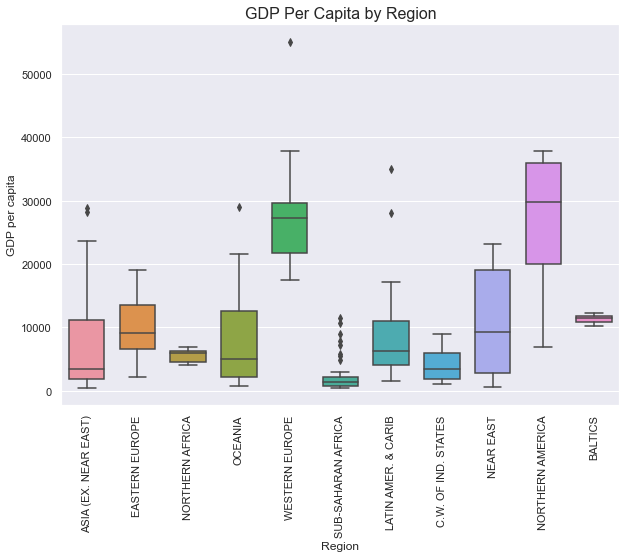

In [10]:
plt.rcParams['figure.figsize']=(10,7)
sns.boxplot(x = "region",y = "gdp",data = data, width = .7)
plt.xticks(rotation = 90)
plt.ylabel('GDP per capita')
plt.xlabel('Region')
plt.title('GDP Per Capita by Region', fontsize = 16)
plt.show()

The above box plots illustrate visually the descriptive statistics of the variable GDP per capita, by region.  The distribution of this attribute, skewness, and any outliers can be evaluated from this graph. The specific numbers can be referenced in the previous analysis of the summary statistics by region.

__Kernal Density Estimation (KDE) of GDP per capita for Eastern European and Western European nations:__

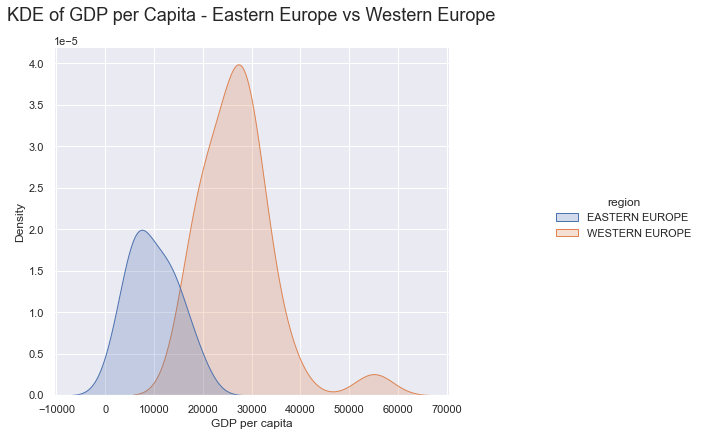

In [11]:
frames = [eastern_eur, western_eur]
europe = pd.concat(frames)

ax = sns.displot(europe, x = "gdp", hue = 'region', kind = "kde", fill = True)
plt.xlabel('GDP per capita')
plt.title('KDE of GDP per Capita - Eastern Europe vs Western Europe\n', fontsize = 18)

ax.fig.set_figwidth(10)
ax.fig.set_figheight(6)

The above KDE graph compares Eastern European countries' GDP per capita to Western European countries' GDP per capita.  As the above graph illustrates, Western Europe contains more countries than Eastern Europe (more observations of the variable GDP to visualize), and the vast majority of countries located in Western Europe have a higher GDP per capita than that of Eastern European nations.

__KDE Distributions of European infant mortality, literacy, birth rates, and death rates:__

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seab

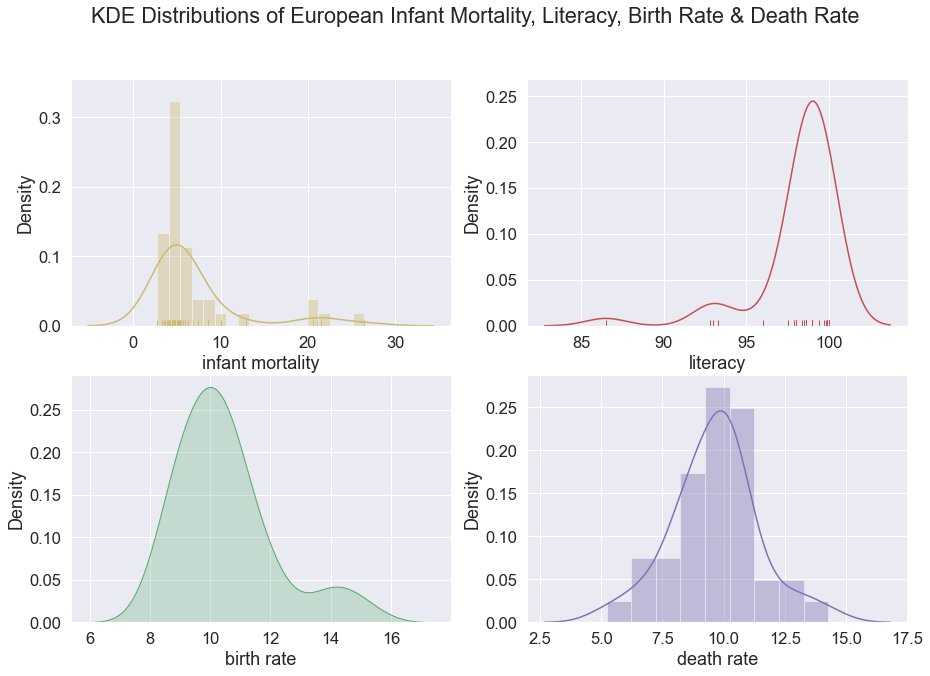

In [12]:
sns.set(style = "darkgrid",font_scale = 1.5)
fig, axes = plt.subplots(2,2,figsize = (15,10))

sns.distplot(europe['infant mortality'], bins = 18,rug = True, kde = True,color = "y", ax = axes[0,0])
sns.distplot(europe.literacy, hist = False, rug = True, color = "r", ax = axes[0,1])
sns.distplot(europe['birth rate'], hist = False, color = "g", kde_kws = {"shade":True}, ax = axes[1,0])
sns.distplot(europe['death rate'], color = "m", ax = axes[1,1])
fig.suptitle("KDE Distributions of European Infant Mortality, Literacy, Birth Rate & Death Rate")
plt.show()

The above KDE Distributions for all European nations show the distributions of infant mortality (# per 1000 births), literacy rate, birth rate, and death rate.  Infant mortality is relatively low (mode ~ 5), and literacy is relatively high, indicating that the vast majority of European citizens are literate.  Moreover, the birth rate and death rate is approximately even, indicating that the populations of countries located in Europe is remaining relatively stable.  These distributions could be compared against those for all African nations, for instance, to illustrate certain discrepancies. 

__KDE Distributions of African infant mortality, literacy, birth rates, and death rates:__

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seab

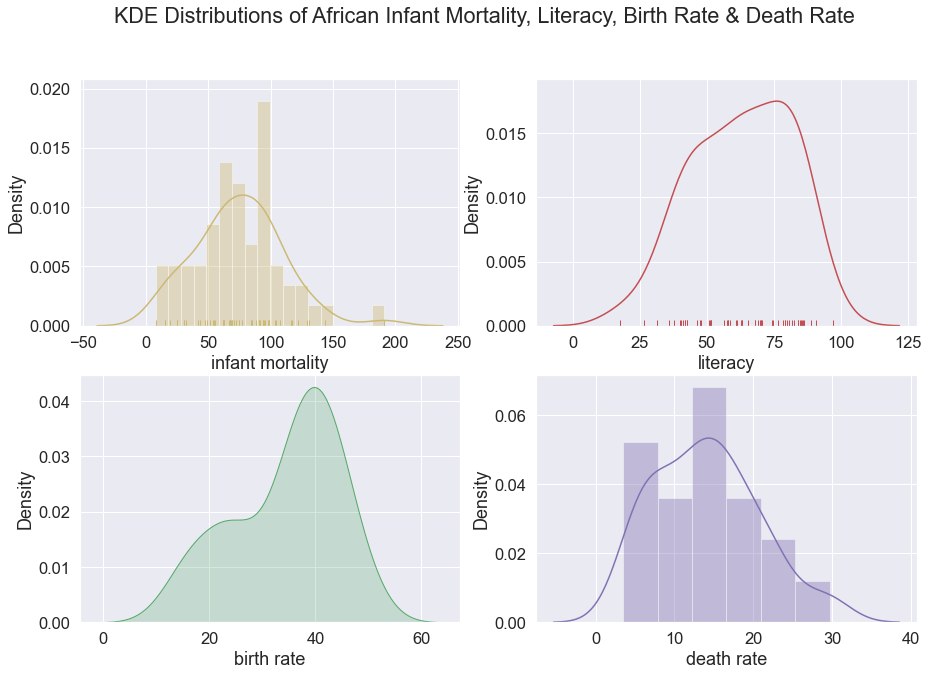

In [20]:
frames2 = [africa, north_africa]
african = pd.concat(frames2)

sns.set(style = "darkgrid",font_scale = 1.5)
fig, axes = plt.subplots(2,2,figsize = (15,10))

sns.distplot(african['infant mortality'], bins = 18,rug = True, kde = True,color = "y", ax = axes[0,0])
sns.distplot(african.literacy, hist = False, rug = True, color = "r", ax = axes[0,1])
sns.distplot(african['birth rate'], hist = False, color = "g", kde_kws = {"shade":True}, ax = axes[1,0])
sns.distplot(african['death rate'], color = "m", ax = axes[1,1])
fig.suptitle("KDE Distributions of African Infant Mortality, Literacy, Birth Rate & Death Rate")
plt.show()

Comparing the above KDE distributions of all African countries to that of European nations, one can clearly see that infant mortality (# per 1000 births) for African countries (mode ~ 98) is substantially highly than European nations' infant mortality (mode ~ 5).  The literacy rate for African nations (mode ~ 77%) also lags far behind that of European nations (mode ~ 97%). Moreover, unlike European nations, the birth rate for African countries is clearly outpacing the death rate, indicating that the populations of many African countries is growing.

__Look at a correlation heatmap to see the correlations between numerical variables:__

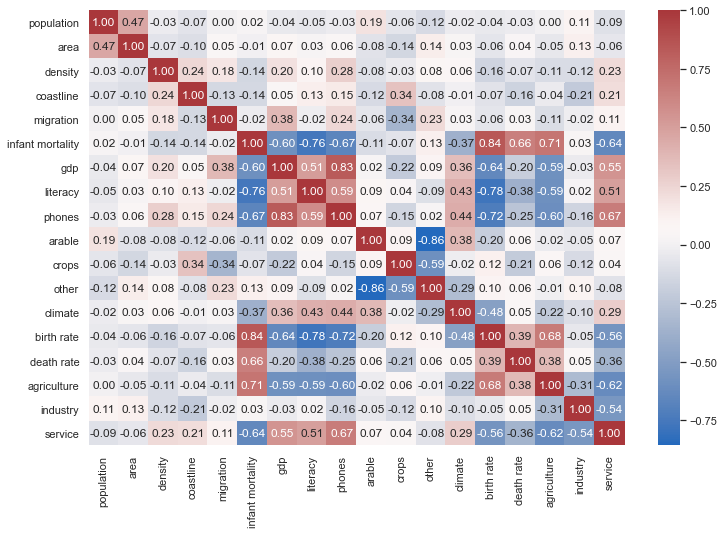

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(data = data.iloc[:,2:].corr(), annot = True, fmt = '.2f', cmap = 'vlag')
plt.show()

The above correlation heatmap shows the correlations between all numerical variables in the dataset. Most of the correlations that are going to be of greatest interest are those relating to GDP (per capita). For instance, there is an 83% correlation between GDP and phones (# per 1000 ppl), indicating that wealthier societies have more citizens with phones.  Another point of interest/concern, is the fact that there is an 84% correlation between infant mortality and birth rate, indicating possible multicollinearity.  One of these variables will most likely need to be removed (along with the variable other) from the dataset before attempting to build any regression models.  